<a href="https://www.kaggle.com/code/muhammadasifwazir/netflix-business-case-study-eda-using-python-02?scriptVersionId=197513132" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Netflix Business Case study - EDA using Python**

**Objectives of the Assignment**

- Perform EDA on the given dataset and find insights.

- Provide Useful Insights and Business recommendations that can help the business to grow.


# 1. **IMPORTING LIBRIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. **LOADING DATA**

In [2]:
df=pd.read_csv(r'/kaggle/input/netflix-dataset/Netflix_dataset.csv')

# 3. **BASIC OBSERVATIONS**
- Shape of the dataset
- Checking few rows
- Count of the non-null values
- Unique values of each column
- Detailed description of numerical and categorical columns

In [3]:
df.shape

(8807, 12)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Why Only release_year is Numerical:**

The release_year column is intended to represent a specific quantity (the year), while the other columns contain information that is descriptive or categorical in nature, such as the title of a show, its type, cast, director, and more. These types of data are better represented as objects (strings) rather than numerical values.

In [7]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

# 4. **DATA CLEANING**

**0A. Removing Extra information column**

In [9]:
df = df.drop('description', axis=1)

**A. Overall null values in each column**

In [10]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In the dataset, there are 3 missing values found in the duration column that were present in the rating column. We transferred these values from the rating column to the duration column and filled the corresponding entries in the rating column with 'Not Rated'.

In [11]:
#df[df['rating'].isna()]
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


1. we also found that there are 3 wrong entries at duration column at show_id s5542,s5795 , s5814

**B. Impute null values using fillna() method**
- Fill the null values in rating column

In [12]:
df['rating'] = df['rating'].fillna('Not Rated')

**C. Replace the wrong entries in rating and duration column**

**Identified Issues:** We discovered that some entries in the rating column were incorrectly labeled as durations and needed to be transferred to the duration column.

**Transferred Values:** We created a method to transfer specific duration entries from the rating column to the duration column.

**Updated Specific Rows:** We modified the rating and duration columns for specific rows identified by show_ids that contained incorrect entries.

**Replaced Values:** We replaced all occurrences of 'NR', 'UR' and 'Not Rated' in the rating column with 'Not Rated'.

In [13]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Not Rated', 'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
#return all rows where the rating column matches any of the specified values
df[df['rating'].isin(['74 min', '84 min', '66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [15]:
df[df['show_id'].isin(['s5542','s5795','s5814'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [16]:
# Update the rating and duration for specific show_ids
df.loc[df['show_id'] == 's5542', ['rating', 'duration']] = ['None', '90 min']
df.loc[df['show_id'] == 's5795', ['rating', 'duration']] = ['None', '120 min']
df.loc[df['show_id'] == 's5814', ['rating', 'duration']] = ['None', '60 min']

- Rating column: NR (Not rated), UR (Unrated), and Not Rated are same. So convert all these into 'Not Rating' Only

In [17]:
# replace all occurrences of 'NR' and 'UR' with 'Not Rated' in the rating column
df['rating'] = df['rating'].replace(['NR', 'UR'], 'Not Rated')

In [18]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'None', 'Not Rated', 'TV-Y7-FV'],
      dtype=object)

In [19]:
df.rating.value_counts()

rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
Not Rated      87
G              41
TV-Y7-FV        6
NC-17           3
None            3
Name: count, dtype: int64

**D. Change the datatype of date_added column from object to datetime using pandas function to_datetime()**

dropped the null from date_added column

In [20]:
#df[df['date_added'].isna()]

In [21]:
df.dropna(subset=['date_added'], inplace=True)

In [22]:
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

For 'date_added' column, all values confirm to date format, So we can convert its data type from object to datetime

In [23]:
#problematic_entries = df[~df['date_added'].str.match(r'^\s*[A-Za-z]+\s+\d{1,2},\s+\d{4}\s*$', na=False)]
#problematic_entries

In [24]:
df[df['date_added'].isin([' August 4, 2017'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand..."
6457,s6458,TV Show,Chef & My Fridge,NaN,"Seong-joo Kim​, Jung-hwan Ahn",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Reali..."
7705,s7706,TV Show,Paranormal Survivor,NaN,NaN,Canada,"August 4, 2017",2016,TV-14,2 Seasons,Docuseries


In [25]:
# Remove spaces from the 'date_added' column
df['date_added'] = df['date_added'].str.strip()

In [26]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [27]:
print(df['date_added'].dtype)

datetime64[ns]


We can add the new column 'year_added' by extracting the year from 'date_added' column

In [28]:
#df['year_added'] = df['date_added'].dt.year

Similar way, We can add the new column 'month_added' by extracting the month from 'date_added' column

In [29]:
#df['month_added'] = df['date_added'].dt.month

In [30]:
#df[['date_added' , 'year_added' , 'month_added']].info()

**Total null values in each column of the Dataset**

In [31]:
df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

**E. Check the types of content present in dataset (Hint unique values of type col)**

In [32]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [33]:
#movies  = df.loc[df['type'] == 'Movie']
#tv_shows = df.loc[df['type'] == 'TV Show'] 

In [34]:
#movies.duration.value_counts()

In [35]:
#tv_shows.duration.value_counts()

# **Challenging Questions:**

- **The oldest and the most recent movie/TV show released on Netflix in which year?**

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [37]:
df.release_year.min() , df.release_year.max()

(1925, 2021)

- **Find the oldest movie/TV show (released in 1925):**

The oldest TV show is "Pioneers: First Women Filmmakers"

In [38]:
oldest_content = df[df['release_year'] == df['release_year'].min()]
oldest_content

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows


- **Find the most recent movie/TV show (released in 2021):**

The most recent TV-show is "Blood & Water"

In [39]:
most_recent_content = df[df['release_year'] == df['release_year'].max()].sort_values('date_added', ascending=False)
most_recent_content.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [40]:
#df.loc[(df.release_year == df.release_year.min()) | (df.release_year == df.release_year.max())].sort_values('release_year')

- **Which are the different ratings available on Netflix in each type of content (Movies/TV Show)? Check the number of contents released in each type.**

In [41]:
print(df.groupby('type')['rating'].value_counts())

type     rating   
Movie    TV-MA        2062
         TV-14        1427
         R             797
         TV-PG         540
         PG-13         490
         PG            287
         TV-Y7         139
         TV-Y          131
         TV-G          126
         Not Rated      80
         G              41
         TV-Y7-FV        5
         NC-17           3
         None            3
TV Show  TV-MA        1143
         TV-14         730
         TV-PG         321
         TV-Y7         194
         TV-Y          175
         TV-G           94
         Not Rated       6
         R               2
         TV-Y7-FV        1
Name: count, dtype: int64


In [42]:
#df['country'].value_counts()

In [43]:
#country_tb = df[['show_id' , 'type' , 'country']]
#country_tb.dropna(inplace = True)
#country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))
#country_tb = country_tb.explode('country')
#country_tb

In [44]:
#country_tb['country'] = country_tb['country'].str.strip()

In [45]:
#country_tb.loc[country_tb['country'] == '']

In [46]:
#country_tb['country'].nunique()

so total movies from 123 countries

•	Total movies and tv shows directed by each director.

In [47]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

# Visual Analysis

1. **Distribution of content across the different types (Movies/TV Shows) using matplotlib pie chart**

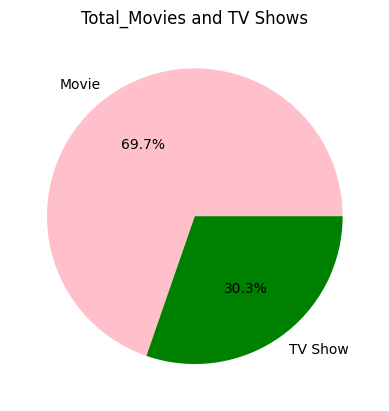

In [48]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['pink' , 'green'])
plt.title('Total_Movies and TV Shows')
plt.show()

2. **General visual analysis of null values in each column**

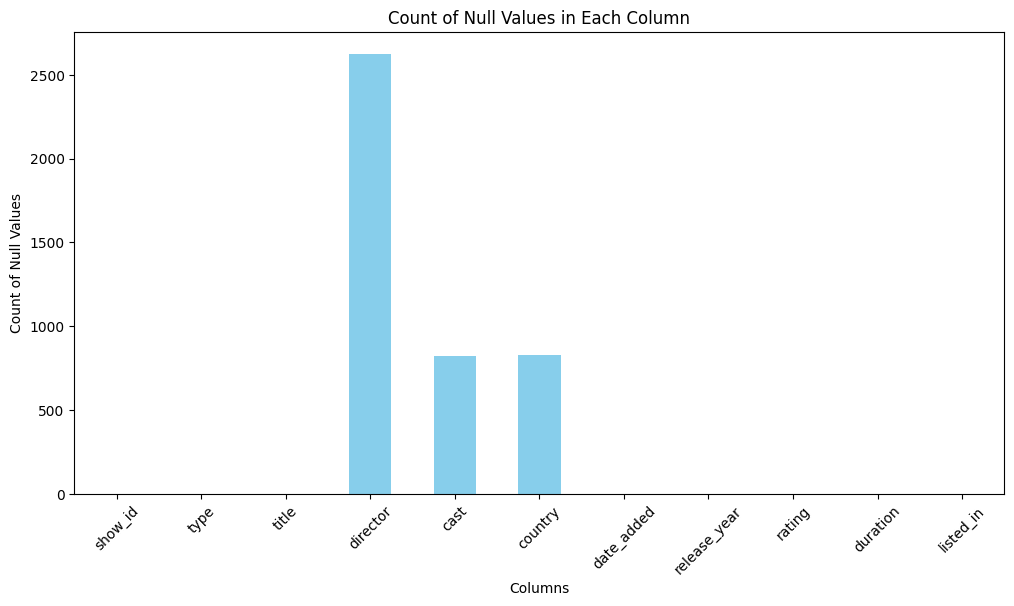

In [49]:
null_counts = df.isnull().sum()

plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45)
plt.show()


3. **Seaborn box plot for each numeric column to identify any outliers.**

Numeric columns: Index(['release_year'], dtype='object')


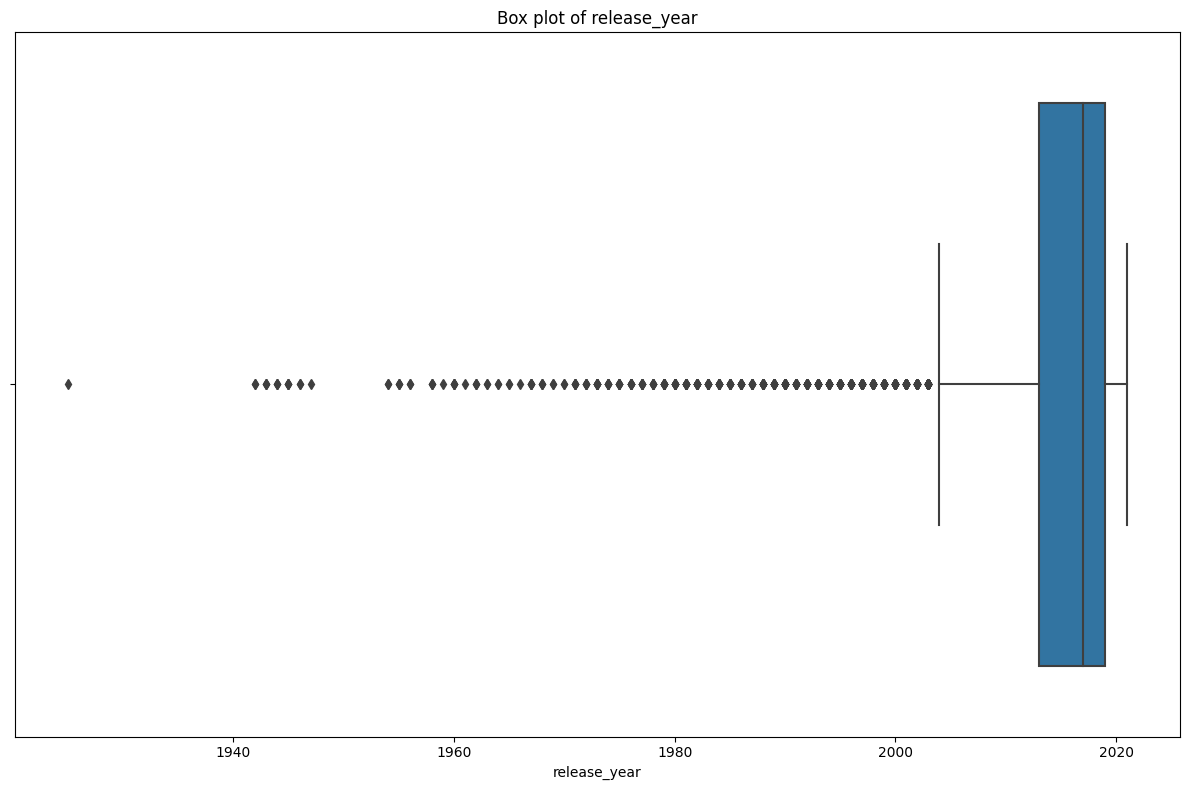

In [50]:

# Checking for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print(f"Numeric columns: {numeric_cols}")

# Plotting box plots for each numeric column
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


# Insights and Business Recommendations

Based on the exploratory data analysis performed on the Netflix dataset, here are some key insights and actionable business recommendations:

# Insights:

# Dataset Overview:



The dataset contains information about 8,807 movies and TV shows.
There is a single numeric column, release_year, with the rest being categorical.


**Missing Values:**

The duration column had 3 missing values which were imputed.
The rating column had missing values replaced with 'Not Available'.
The date_added column had some missing values which were dropped before converting the column to datetime format.


**Content Release Years:**

The oldest content on Netflix dates back to 1925.
The most recent content was released in 2021.


**Content Types:**

Netflix's catalog consists of two types of content: Movies and TV Shows.
Movies make up a larger proportion of the content compared to TV Shows.


**Ratings Distribution:**

Netflix offers a variety of ratings for its content, including 'TV-MA', 'TV-14', 'R', 'PG-13', 'NR', and 'Not Rated'.
'TV-MA' and 'TV-14' are the most common ratings for TV Shows, while 'R' and 'PG-13' are prevalent among movies.


**Country-wise Distribution:**

Content is available from 123 different countries, with the USA being the leading contributor.


**Director Contributions:**

Some directors have a higher number of contributions, with Michael Bay and Steven Spielberg among the notable ones.


**Null Values:**

Some columns still have null values even after initial cleaning. Specifically, cast, country, and director columns have significant missing values.


**Outliers:**

Box plots for the numeric column release_year reveal the presence of outliers. This could be due to old content being added to Netflix’s catalog, which is not necessarily a data quality issue but worth noting.




# Business Recommendations:


**Content Diversification:**

Continue to diversify the catalog by adding more international content to attract a global audience.
Focus on regions with fewer contributions to balance the content distribution.


**Director Collaborations:**

Engage with directors who have significantly contributed to popular content. Offering exclusive deals or collaborations with such directors can boost the platform's appeal.


**Improve Data Completeness:**

Address the missing values in key columns like cast, country, and director to enhance data quality.
Consider using advanced imputation techniques or gathering additional data to fill these gaps.


**Content Strategy:**

Use insights from release years and ratings distribution to guide future content acquisitions and productions. For example, there may be an opportunity to acquire or produce more content for underrepresented ratings.


**Targeted Marketing:**

Tailor marketing campaigns based on content type and ratings to different subscriber segments. For instance, highlight 'TV-MA' content to adult audiences while promoting 'PG-13' and 'TV-14' content to younger demographics.


**Focus on International Markets:**

Given the wide range of countries represented in the dataset, expanding marketing efforts and localization to these regions can help grow the subscriber base.


**Monitor and Manage Outliers:**

Regularly review outliers in the release_year data to ensure they are intentional additions to the catalog and not data entry errors.


**Enhance User Experience:**

Use the cleaned and enriched data to improve the recommendation algorithms, offering users a more personalized viewing experience based on their preferences and viewing history.











**By leveraging these insights and recommendations, Netflix can continue to grow its platform, enhance user satisfaction, and maintain its position as a leading media and video streaming service.**